In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

NameError: name 'url' is not defined

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0631b31bc1e84dcc5a9a5bc313427bf


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maarianhamina
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | la rioja
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | hambantota
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | ptuj
Processing Record 17 of Set 1 | harper
Processing Record 18 of Set 1 | cap malheureux
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | kourou
Processing Record 21 of Set 1 | iquique
Processing Record 22 of Set 1 | saskylak

Processing Record 36 of Set 4 | tsabong
Processing Record 37 of Set 4 | nizwa
Processing Record 38 of Set 4 | peterhead
Processing Record 39 of Set 4 | kayes
Processing Record 40 of Set 4 | biskamzha
Processing Record 41 of Set 4 | meyungs
City not found. Skipping...
Processing Record 42 of Set 4 | magaria
Processing Record 43 of Set 4 | kavarna
Processing Record 44 of Set 4 | oktyabrskoye
Processing Record 45 of Set 4 | nehe
Processing Record 46 of Set 4 | kamenka
Processing Record 47 of Set 4 | nezhinka
Processing Record 48 of Set 4 | kavarskas
Processing Record 49 of Set 4 | brenham
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | shuangyang
Processing Record 2 of Set 5 | chortomlyk
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | macamic
Processing Record 5 of Set 5 | bambanglipuro
Processing Record 6 of Set 5 | shetpe
Processing Record 7 of Set 5 | pingzhuang
Processing Record 8 of Set 5 | hilo
Processing Record 9 of Set 5 | tumannyy
C

Processing Record 31 of Set 8 | arcani
Processing Record 32 of Set 8 | ouallam
Processing Record 33 of Set 8 | marawi
Processing Record 34 of Set 8 | eyl
Processing Record 35 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 36 of Set 8 | kilosa
Processing Record 37 of Set 8 | mayo
Processing Record 38 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 39 of Set 8 | half moon bay
Processing Record 40 of Set 8 | haverfordwest
Processing Record 41 of Set 8 | tumut
Processing Record 42 of Set 8 | pangnirtung
Processing Record 43 of Set 8 | luganville
Processing Record 44 of Set 8 | pangody
Processing Record 45 of Set 8 | lewisporte
Processing Record 46 of Set 8 | kitimat
Processing Record 47 of Set 8 | rio casca
Processing Record 48 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 49 of Set 8 | ozgon
City not found. Skipping...
Processing Record 50 of Set 8 | ladario
Processing Record 1 of Set 9 | ixtapa
Processing Record 2 of Set 9 | 

Processing Record 19 of Set 12 | aden
Processing Record 20 of Set 12 | norman
Processing Record 21 of Set 12 | aswan
Processing Record 22 of Set 12 | nalut
Processing Record 23 of Set 12 | birsk
Processing Record 24 of Set 12 | semey
Processing Record 25 of Set 12 | topchikha
Processing Record 26 of Set 12 | raga
Processing Record 27 of Set 12 | punto fijo
Processing Record 28 of Set 12 | constitucion
Processing Record 29 of Set 12 | lincoln
Processing Record 30 of Set 12 | safaga
Processing Record 31 of Set 12 | mangan
Processing Record 32 of Set 12 | waitati
Processing Record 33 of Set 12 | lano
Processing Record 34 of Set 12 | saleaula
City not found. Skipping...
Processing Record 35 of Set 12 | ust-tsilma
Processing Record 36 of Set 12 | kletskaya
Processing Record 37 of Set 12 | belmonte
Processing Record 38 of Set 12 | puerto escondido
Processing Record 39 of Set 12 | flin flon
Processing Record 40 of Set 12 | bokspits
City not found. Skipping...
Processing Record 41 of Set 12 | 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maarianhamina,60.0973,19.9348,46.26,100,74,3.44,AX,2021-10-08 00:45:50
1,Punta Arenas,-53.1500,-70.9167,44.71,61,0,16.11,CL,2021-10-08 00:42:59
2,La Rioja,42.2500,-2.5000,46.18,58,9,5.61,ES,2021-10-08 00:45:50
3,Hobart,-42.8794,147.3294,65.01,53,40,5.01,AU,2021-10-08 00:45:50
4,Bredasdorp,-34.5322,20.0403,56.52,94,0,2.30,ZA,2021-10-08 00:45:51
5,Barrow,71.2906,-156.7887,33.82,80,90,9.22,US,2021-10-08 00:45:51
6,Kahului,20.8947,-156.4700,82.42,69,40,21.85,US,2021-10-08 00:45:34
7,Lebu,-37.6167,-73.6500,47.97,85,0,8.99,CL,2021-10-08 00:45:52
8,Cape Town,-33.9258,18.4232,58.10,66,75,17.27,ZA,2021-10-08 00:43:01
9,Hambantota,6.1241,81.1185,77.34,100,20,6.91,LK,2021-10-08 00:45:52


In [12]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maarianhamina,AX,2021-10-08 00:45:50,60.0973,19.9348,46.26,100,74,3.44
1,Punta Arenas,CL,2021-10-08 00:42:59,-53.1500,-70.9167,44.71,61,0,16.11
2,La Rioja,ES,2021-10-08 00:45:50,42.2500,-2.5000,46.18,58,9,5.61
3,Hobart,AU,2021-10-08 00:45:50,-42.8794,147.3294,65.01,53,40,5.01
4,Bredasdorp,ZA,2021-10-08 00:45:51,-34.5322,20.0403,56.52,94,0,2.30
...,...,...,...,...,...,...,...,...,...
576,El Real De Santa Maria,PA,2021-10-08 00:49:31,8.1090,-77.7325,75.52,98,100,1.41
577,Betioky,MG,2021-10-08 00:49:31,-23.7167,44.3833,60.15,72,6,13.49
578,Lewiston,US,2021-10-08 00:49:32,44.1003,-70.2148,59.40,94,1,4.61
579,Ahipara,NZ,2021-10-08 00:49:32,-35.1667,173.1667,62.69,70,0,10.40


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

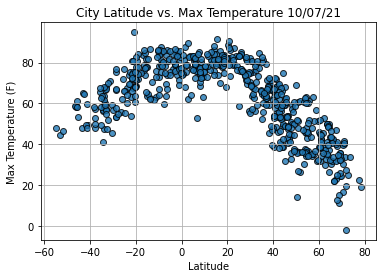

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

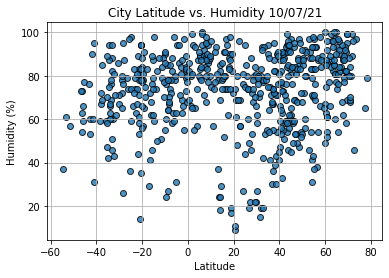

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


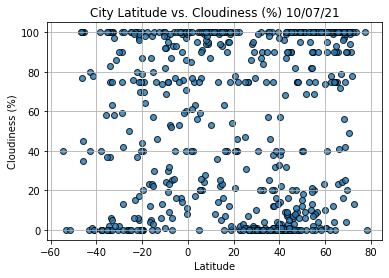

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


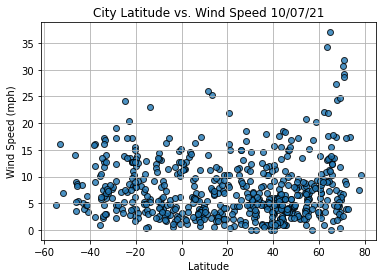

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

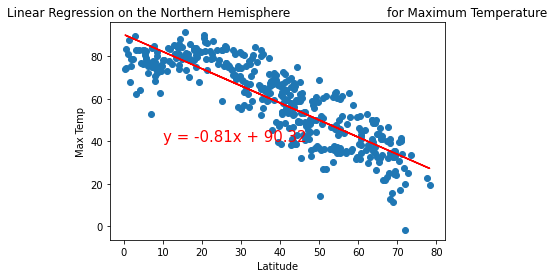

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

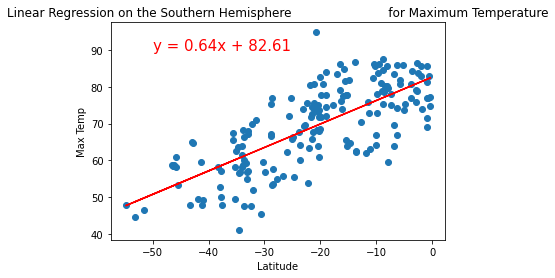

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


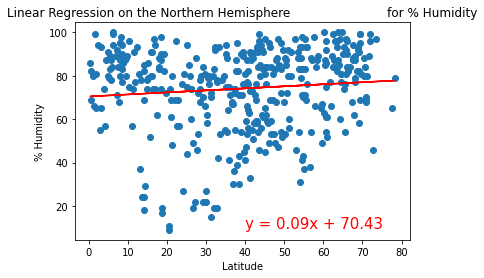

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

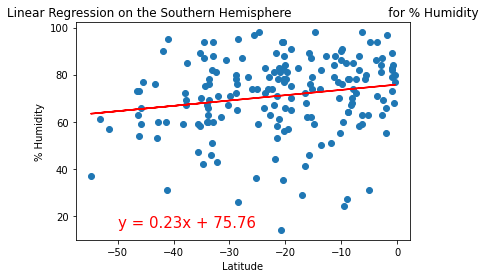

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

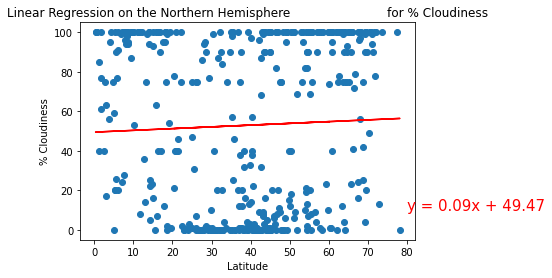

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(80,10))

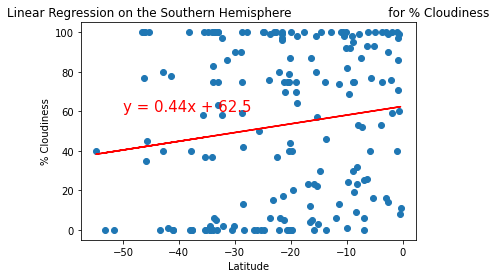

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))